
# Developing an Automated Water Quality Prediction System using Machine Learning

**Goal of this project** :The project goals for the Omdena Rwanda Chapter's water quality prediction project are:

1. Enhance accessibility to clean water: The project aims to contribute to the broader objective of improving access to clean water. By predicting water quality, the model will assist in ensuring the availability of safe and clean water for drinking, agriculture, and other essential uses.

2. Optimize prediction efficiency:The project strives to create an efficient model that can quickly generate water quality predictions. By leveraging machine learning algorithms and techniques, the model will expedite decision-making processes, enabling prompt actions to address water quality issues.

3. Safeguard public health and promote agricultural productivity : Accurate water quality prediction is vital for protecting public health and maximizing agricultural productivity. By delivering timely and precise information on water quality, the project will help prevent potential health risks and support optimal agricultural practices.

The Omdena Rwanda Chapter's project focuses on developing an accurate, efficient, and cost-effective machine learning model to predict water quality. By doing so, the project aims to contribute to improved accessibility to clean water, enhance decision-making processes, reduce costs, and promote public health and agricultural productivity.

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [259]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [257]:
# Read the CSV file using pandas
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Synthetic_Data_Water_Quality_v1.csv')
df.head()

,Colour (TCU),Turbidity (NTU),pH,Conductivity (uS/cm),Total Dissolved Solids (mg/l),Total Hardness (mg/l as CaCO3),Aluminium (mg/l),Chloride (mg/l),Total Iron (mg/l),Sodium (mg/l),Sulphate (mg/l),Zinc (mg/l),Magnesium (mg/l),Calcium (mg/l),Potassium (mg/l),Nitrate (mg/l),Phosphate (mg/l),Potability
0,8.34,3.39,7.0,819.00,787.15,279.89,0.09,129.30,0.22,13.13,81.01,2.24,12.69,107.95,17.50,22.23,0.41,potable
1,14.45,3.36,7.0,1371.10,779.66,112.04,0.20,163.73,0.13,127.48,307.99,4.05,52.01,107.12,45.28,16.06,0.68,potable
2,3.87,4.23,7.0,202.75,485.10,113.17,0.15,66.68,0.29,142.97,16.70,0.86,88.47,127.47,4.90,19.81,0.91,potable
3,14.57,1.75,7.0,696.16,409.71,140.39,0.06,102.42,0.15,194.07,393.09,2.60,61.36,99.16,36.73,42.82,0.02,potable
4,9.01,2.20,7.0,129.24,343.55,6.52,0.07,140.47,0.28,3.77,170.65,0.04,47.22,107.17,44.79,14.35,2.08,potable


### **EDA**

In [260]:
# Print the Shape
print("Number of rows",df.shape[0])
print("Number of columns",df.shape[1])

Number of rows 10000
Number of columns 18


In [261]:
#statistical summary of numerical columns
df.describe()

,Colour (TCU),Turbidity (NTU),pH,Conductivity (uS/cm),Total Dissolved Solids (mg/l),Total Hardness (mg/l as CaCO3),Aluminium (mg/l),Chloride (mg/l),Total Iron (mg/l),Sodium (mg/l),Sulphate (mg/l),Zinc (mg/l),Magnesium (mg/l),Calcium (mg/l),Potassium (mg/l),Nitrate (mg/l),Phosphate (mg/l)
count,10000.000000,10000.000000,9551.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.006526,5.003388,7.049056,1502.148272,1001.183584,300.613398,0.200808,249.491721,0.300165,200.793553,402.124054,5.004608,100.026299,149.944522,49.838229,45.162176,2.205561
std,8.717615,2.906118,0.546862,869.812955,578.522848,171.478482,0.115359,144.526095,0.174572,116.039382,230.187867,2.897890,57.979525,87.162086,28.795520,25.861234,1.274395
min,0.010000,0.000000,0.000000,0.120000,0.050000,0.030000,0.000000,0.000000,0.000000,0.010000,0.030000,0.000000,0.030000,0.020000,0.000000,0.030000,0.000000
25%,7.517500,2.490000,7.000000,741.635000,494.590000,154.980000,0.100000,122.707500,0.150000,99.890000,205.910000,2.460000,49.362500,74.417500,24.490000,23.150000,1.090000
50%,15.000000,5.000000,7.000000,1500.095000,1000.030000,300.005000,0.200000,249.915000,0.300000,199.995000,400.125000,5.000000,100.015000,150.010000,49.990000,45.010000,2.200000
75%,22.660000,7.530000,7.400000,2259.740000,1497.880000,448.605000,0.300000,374.760000,0.450000,303.645000,601.925000,7.500000,150.130000,226.245000,75.040000,67.772500,3.320000
max,30.000000,10.000000,8.500000,2999.910000,1999.960000,599.970000,0.400000,499.870000,0.600000,399.980000,799.880000,10.000000,199.980000,299.970000,100.000000,90.000000,4.400000


In [262]:
#check missing value
df.isnull().sum()

Colour (TCU)                        0
Turbidity (NTU)                     0
 pH                               449
Conductivity (uS/cm)                0
Total Dissolved Solids (mg/l)       0
Total Hardness (mg/l as CaCO3)      0
Aluminium (mg/l)                    0
Chloride (mg/l)                     0
Total Iron (mg/l)                   0
Sodium (mg/l)                       0
Sulphate (mg/l)                     0
Zinc (mg/l)                         0
Magnesium (mg/l)                    0
Calcium (mg/l)                      0
Potassium (mg/l)                    0
Nitrate (mg/l)                      0
Phosphate (mg/l)                    0
Potability                          0
dtype: int64

In [263]:
# Replace the missing values
df.fillna(df.mean(), inplace=True)
df.sample(5)

,Colour (TCU),Turbidity (NTU),pH,Conductivity (uS/cm),Total Dissolved Solids (mg/l),Total Hardness (mg/l as CaCO3),Aluminium (mg/l),Chloride (mg/l),Total Iron (mg/l),Sodium (mg/l),Sulphate (mg/l),Zinc (mg/l),Magnesium (mg/l),Calcium (mg/l),Potassium (mg/l),Nitrate (mg/l),Phosphate (mg/l),Potability
2835,6.84,1.47,7.70,930.56,984.67,74.99,0.02,15.77,0.23,107.87,151.99,1.97,27.95,42.94,32.07,22.33,0.83,potable
9590,17.20,7.04,7.00,2745.20,1949.11,504.80,0.26,296.45,0.35,266.23,424.42,9.77,120.48,206.08,94.54,47.82,2.92,non-potable
6775,15.73,8.59,7.00,2934.63,1897.11,596.55,0.37,437.61,0.42,261.66,649.11,9.38,198.29,279.59,93.17,60.51,3.97,non-potable
7973,20.71,6.72,7.00,2898.16,1469.73,322.78,0.31,261.48,0.36,214.90,697.56,8.76,186.22,200.51,82.07,46.14,3.69,non-potable
3216,8.84,0.25,6.76,398.93,206.91,208.91,0.09,174.92,0.04,194.65,354.15,4.08,52.09,4.69,48.58,13.28,0.27,potable


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Colour (TCU)                    10000 non-null  float64
 1   Turbidity (NTU)                 10000 non-null  float64
 2    pH                             10000 non-null  float64
 3   Conductivity (uS/cm)            10000 non-null  float64
 4   Total Dissolved Solids (mg/l)   10000 non-null  float64
 5   Total Hardness (mg/l as CaCO3)  10000 non-null  float64
 6   Aluminium (mg/l)                10000 non-null  float64
 7   Chloride (mg/l)                 10000 non-null  float64
 8   Total Iron (mg/l)               10000 non-null  float64
 9   Sodium (mg/l)                   10000 non-null  float64
 10  Sulphate (mg/l)                 10000 non-null  float64
 11  Zinc (mg/l)                     10000 non-null  float64
 12  Magnesium (mg/l)                1

In [265]:
# As Potability data type "object" so assuming non-potable: 0, potable: 1
df['Potability'] = df['Potability'].replace({'non-potable': 0, 'potable': 1})

In [266]:
#Toatal number of Potability
df.Potability.value_counts()

1    5000
0    5000
Name: Potability, dtype: int64

In [267]:
# Number of value against Potability
df.groupby("Potability").count()

,Colour (TCU),Turbidity (NTU),pH,Conductivity (uS/cm),Total Dissolved Solids (mg/l),Total Hardness (mg/l as CaCO3),Aluminium (mg/l),Chloride (mg/l),Total Iron (mg/l),Sodium (mg/l),Sulphate (mg/l),Zinc (mg/l),Magnesium (mg/l),Calcium (mg/l),Potassium (mg/l),Nitrate (mg/l),Phosphate (mg/l)
Potability,,,,,,,,,,,,,,,,,
0,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
1,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


Data Visualization

In [268]:
df.columns

Index(['Colour (TCU)', 'Turbidity (NTU)', ' pH', 'Conductivity (uS/cm)',
       'Total Dissolved Solids (mg/l)', 'Total Hardness (mg/l as CaCO3)',
       'Aluminium (mg/l)', 'Chloride (mg/l)', 'Total Iron (mg/l)',
       'Sodium (mg/l)', 'Sulphate (mg/l)', 'Zinc (mg/l)', 'Magnesium (mg/l)',
       'Calcium (mg/l)', 'Potassium (mg/l)', 'Nitrate (mg/l)',
       'Phosphate (mg/l)', 'Potability'],
      dtype='object')

In [269]:
#As column name is long and not suitable so change the column name
df = df.rename(columns = {
    'Colour (TCU)' : 'colour' ,'Turbidity (NTU)' : 'turbidity' , 'Conductivity (uS/cm)' : 'conductivity' ,
    'Total Dissolved Solids (mg/l)' : 'tds' ,'Total Hardness (mg/l as CaCO3)' : 'Th' ,'Aluminium (mg/l)' : 'aluminium' ,
    'Chloride (mg/l)' : 'chloride' ,'Total Iron (mg/l)' : 'TI' ,'Sodium (mg/l)' : 'sodium' ,
    'Sulphate (mg/l)' : 'sulphate' ,'Zinc (mg/l)' : 'zinc' ,'Magnesium (mg/l)' : 'magnesium' , 'Calcium (mg/l)' : 'calcium' ,
    'Potassium (mg/l)' : 'potassium' ,'Nitrate (mg/l)' : 'nitrate' , 'Phosphate (mg/l)' : 'phosphate','Potability':'potability'
})

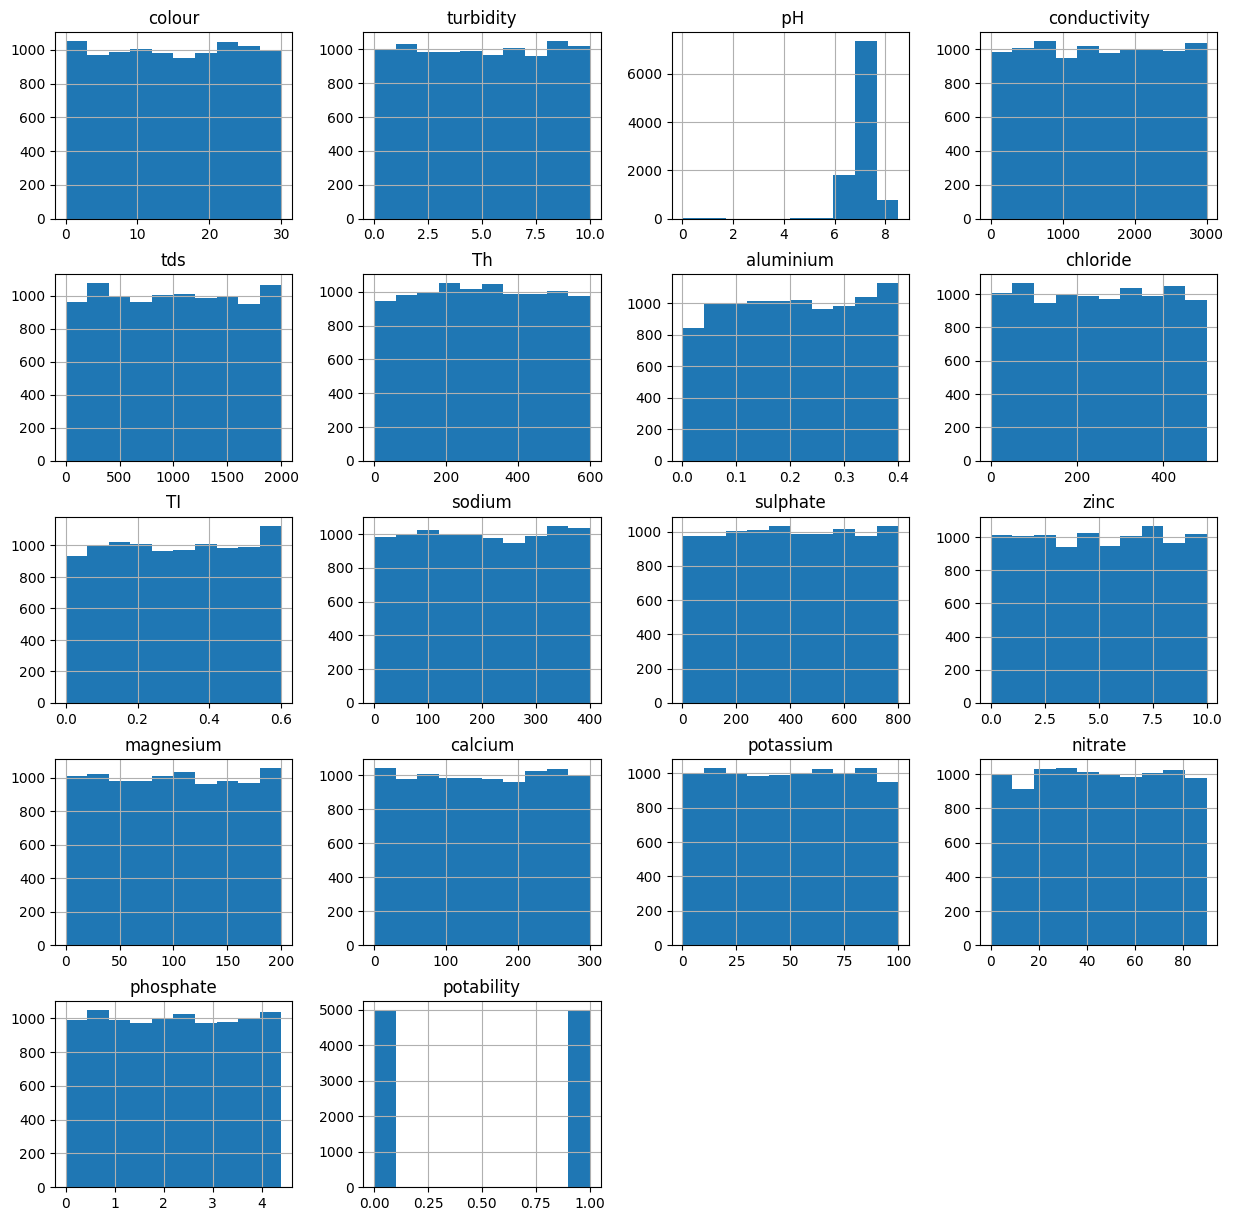

In [270]:
#Visualize the data
df.hist(figsize=(15,15))
plt.show()

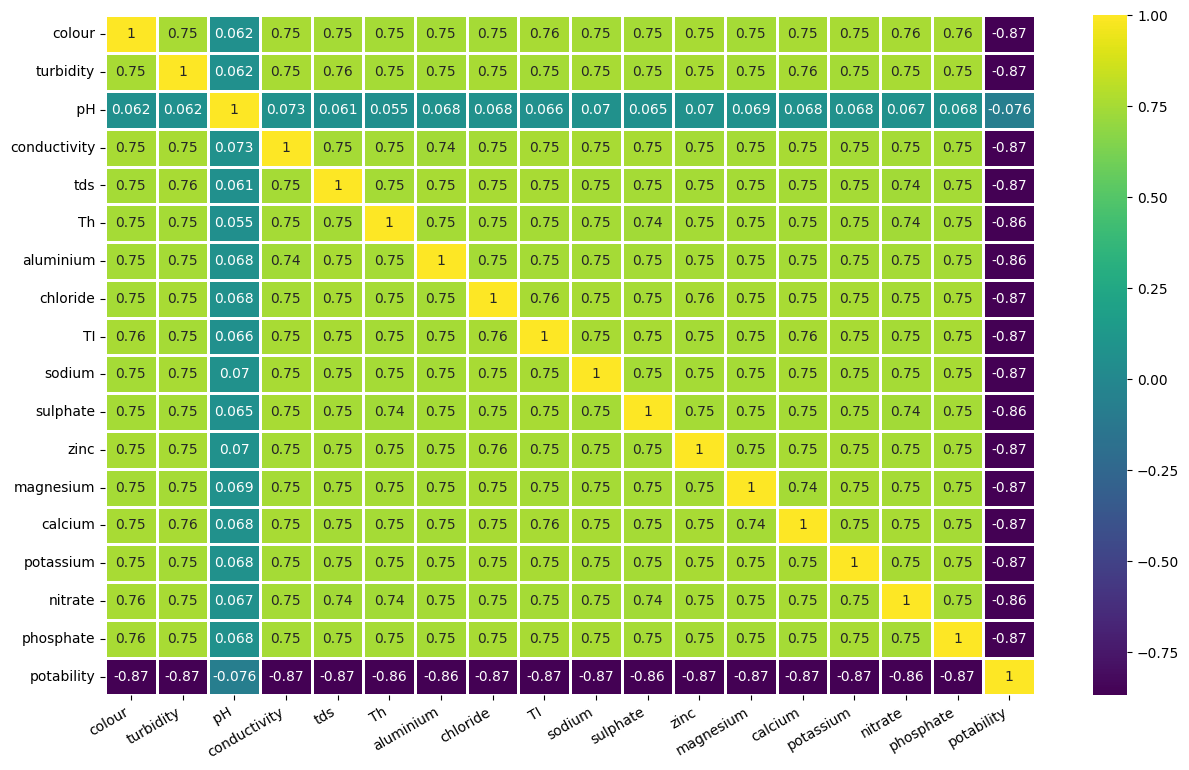

In [271]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=1,fmt='0.2g')
plt.gcf().autofmt_xdate()

<Axes: >

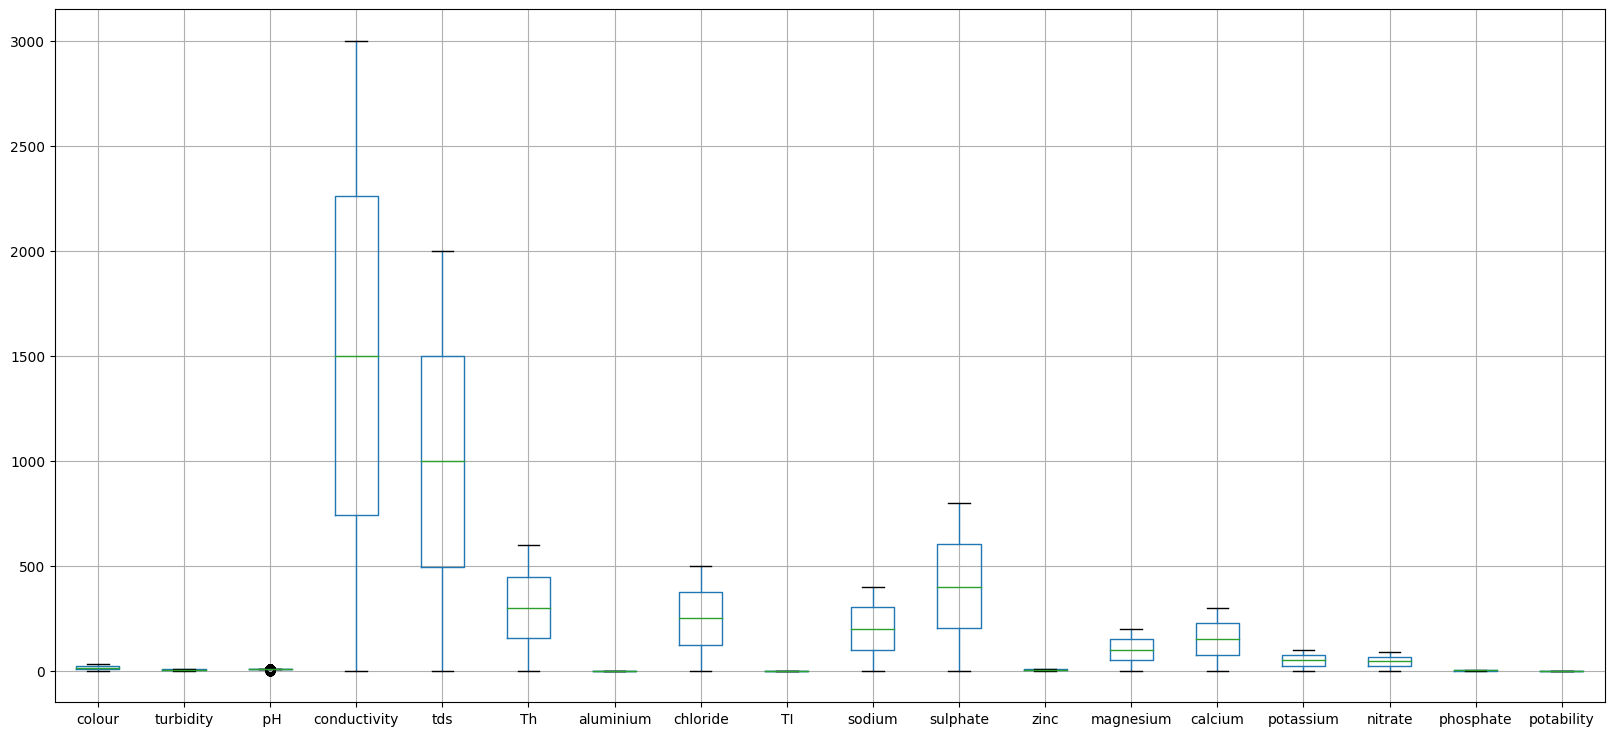

In [339]:
df.boxplot(figsize=(20,9))

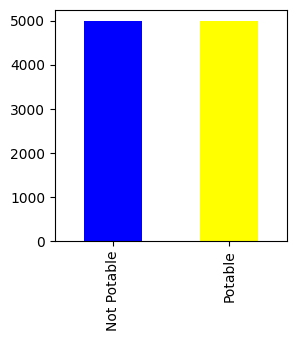

In [273]:
plt.figure(figsize=(3,3))
df.potability.value_counts().plot(kind="bar", color=["blue", "yellow"])
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

In [274]:
X = df.drop('potability',axis=1).values
y = df['potability'].values

### **Split train and test data**

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [276]:
print('Size Training Set: {}'.format(len(X_train)))
print('Size Testing Set: {}'.format(len(X_test)))

Size Training Set: 7000
Size Testing Set: 3000


In [277]:
# Apply scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Apply ML Algorithm

In [305]:
# Call ML library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation & CV Libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


 Logistic Regression

In [297]:
model_lgr = LogisticRegression(max_iter=1000, random_state=42, n_jobs=1)
model_lgr.fit(X_train, y_train)
pred_lgr = model_lgr.predict(X_test)

In [300]:
lgr = accuracy_score(y_test, pred_lgr)
print(" Logistic Regression accuracy:",lgr)

 Logistic Regression accuracy: 1.0


In [301]:
print(classification_report(y_test,pred_lgr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1496
           1       1.00      1.00      1.00      1504

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



GaussianNB

In [332]:
model = GaussianNB()

# Training Model
model.fit(X_train, y_train)

# Making predictions
y_predgb = model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_predgb)
print("Accuracy: {accuracy}")

Accuracy: {accuracy}


In [333]:
print(classification_report(y_test,y_predgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1496
           1       1.00      1.00      1.00      1504

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



Decision Tree Classifier

In [302]:
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)
# Training Model
model_dt.fit(X_train,y_train)
DecisionTreeClassifier(max_depth=4, random_state=42)
#Prediction
pred_dt = model_dt.predict(X_test)

In [303]:
dt = accuracy_score(y_test, pred_dt)
print("Decision Tree Classifier accuracy:",dt)

Decision Tree Classifier accuracy: 1.0


In [304]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1496
           1       1.00      1.00      1.00      1504

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



Random Forest

In [308]:
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)
# Training Model
model_rf.fit(X_train, y_train)
RandomForestClassifier(min_samples_leaf=0.5, n_estimators=200, random_state=42)
# Making Prediction
pred_rf = model_rf.predict(X_test)
# Calculating Accuracy Score
rf = accuracy_score(y_test, pred_rf)
print("Random Forest accuray:",rf)

Random Forest accuray: 1.0


In [309]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1496
           1       1.00      1.00      1.00      1504

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



KNeighbours

In [324]:
# Creating model object
model_kng = KNeighborsClassifier(n_neighbors=5, leaf_size=10)
# Training Model
model_kng.fit(X_train, y_train)
KNeighborsClassifier(leaf_size=10, n_neighbors=5)
# Making Prediction
pred_kng = model_kng.predict(X_test)
# Calculating Accuracy Score
kng = accuracy_score(y_test, pred_kng)
print("Accuracy Score: ",kng)


Accuracy Score:  1.0


In [323]:
print(classification_report(y_test,pred_kng))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1496
           1       1.00      1.00      1.00      1504

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



SVC

In [327]:
model_svm = SVC(kernel='rbf', random_state = 42)
model_svm.fit(X_train, y_train)
SVC(random_state=42)
# Making Prediction
pred_svm = model_svm.predict(X_test)
# Calculating Accuracy Score
svc= accuracy_score(y_test, pred_svm)
print("accuracy SVC:",svc)


accuracy SVC: 1.0


In [330]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1496
           1       1.00      1.00      1.00      1504

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



Apply ANN Model

In [256]:
from keras.models import Sequential
from keras.layers import Dense

# Hidden layer
model = Sequential()
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(125, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=50, batch_size=50)

# Make predictions
predictions = model.predict(X)
print(predictions)


Epoch 1/50
200/200 [==============================] - 4s 17ms/step - loss: 3.1430 - accuracy: 0.8809
Epoch 2/50
200/200 [==============================] - 4s 20ms/step - loss: 0.3273 - accuracy: 0.9449
Epoch 3/50
200/200 [==============================] - 4s 20ms/step - loss: 0.0565 - accuracy: 0.9791
Epoch 4/50
200/200 [==============================] - 3s 16ms/step - loss: 0.0399 - accuracy: 0.9855
Epoch 5/50
200/200 [==============================] - 3s 16ms/step - loss: 0.0847 - accuracy: 0.9743
Epoch 6/50
200/200 [==============================] - 4s 21ms/step - loss: 0.0517 - accuracy: 0.9820
Epoch 7/50
200/200 [==============================] - 4s 20ms/step - loss: 0.0170 - accuracy: 0.9941
Epoch 8/50
200/200 [==============================] - 4s 18ms/step - loss: 0.0260 - accuracy: 0.9906
Epoch 9/50
200/200 [==============================] - 3s 16ms/step - loss: 0.0195 - accuracy: 0.9932
Epoch 10/50
200/200 [==============================] - 6s 31ms/step - loss: 0.0286 - accura